In [16]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation, rc
from IPython.display import HTML
from numba import jit

import rwth_project.numeric_qevolution as nqev
reload(nqev)

import rwth_project.bloch_plotting as bplt
reload(bplt)

rc('animation', embed_limit=1024)

CPU times: user 372 ms, sys: 74.9 ms, total: 447 ms
Wall time: 449 ms


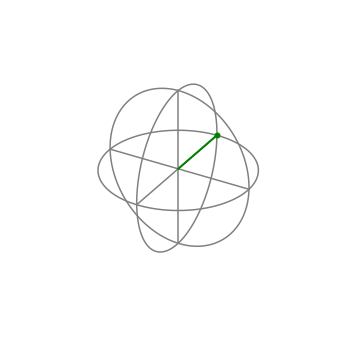

In [28]:
w_0 = 1.0
w_D = 1.0
w_R = 1.0
H_1 = lambda t: np.ones_like(t) * 0.4

H_static = [
    lambda t: np.cos(w_D*t)*H_1(t)*0.5, 
    lambda t: np.sin(w_D*t)*H_1(t)*0.0,
    lambda t: np.ones_like(w_0*t) * w_0 * 0.5
]

psi_0 = np.array([1, 1j])
psi_0 = psi_0 / np.linalg.norm(psi_0)

%time psi_t = nqev.integrate_evolution(H_static, 1e-4, 0.2, 10*np.pi, psi_0, rotating_frame=False, w_R=w_R)

ani = bplt.animate_state_list(psi_t, interval=40, trace_endpoint=True)

ani.save("lf-pd-2pi.mp4")

HTML(ani.to_jshtml())